# 1. Import and Install Dependencies

In [37]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.4.1

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [38]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [39]:
draw_landmarks(frame, results)

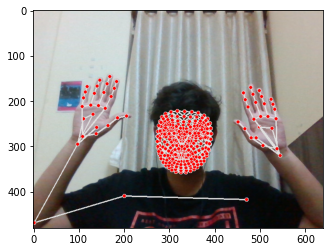

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [41]:
len(results.left_hand_landmarks.landmark)

21

In [42]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [43]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [44]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [45]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [46]:
result_test = extract_keypoints(results)

In [47]:
result_test

array([ 0.51334274,  0.62550002, -1.4840591 , ...,  0.18684424,
        0.35149372, -0.0201612 ])

In [50]:
np.save('0', result_test)

In [51]:
np.load('0.npy')

array([ 0.51334274,  0.62550002, -1.4840591 , ...,  0.18684424,
        0.35149372, -0.0201612 ])

# 4. Setup Folders for Collection

In [48]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data') 

# Actions that we try to detect
actions = np.array(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Good morning", "Hello", "How are you", "I am fine", "Please", "Sorry", "Thank you"])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [56]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [57]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [55]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [59]:
label_map = {label:num for num, label in enumerate(actions)}

In [60]:
label_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 'Good morning': 36,
 'Hello': 37,
 'How are you': 38,
 'I am fine': 39,
 'Please': 40,
 'Sorry': 41,
 'Thank you': 42}

In [61]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [62]:
np.array(sequences).shape

(1290, 30, 1662)

In [63]:
np.array(labels).shape

(1290,)

In [64]:
X = np.array(sequences)

In [65]:
X.shape

(1290, 30, 1662)

In [66]:
y = to_categorical(labels).astype(int)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [100]:
y_train.shape

(645, 43)

# 7. Build and Train LSTM Neural Network

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [102]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [129]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
#model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [130]:
actions.shape[0]

43

In [131]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [132]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
21/21 [==============================] - 5s 64ms/step - loss: 4.2806 - categorical_accuracy: 0.0388
Epoch 2/2000
21/21 [==============================] - 1s 65ms/step - loss: 3.7571 - categorical_accuracy: 0.0264
Epoch 3/2000
21/21 [==============================] - 1s 66ms/step - loss: 3.7697 - categorical_accuracy: 0.0202
Epoch 4/2000
21/21 [==============================] - 1s 66ms/step - loss: 3.7712 - categorical_accuracy: 0.0264
Epoch 5/2000
21/21 [==============================] - 1s 67ms/step - loss: 3.7550 - categorical_accuracy: 0.0543
Epoch 6/2000
21/21 [==============================] - 1s 69ms/step - loss: 3.7374 - categorical_accuracy: 0.0558
Epoch 7/2000
21/21 [==============================] - 2s 78ms/step - loss: 3.7128 - categorical_accuracy: 0.0512
Epoch 8/2000
21/21 [==============================] - 2s 106ms/step - loss: 3.6315 - categorical_accuracy: 0.0620
Epoch 9/2000
21/21 [==============================] - 2s 110ms/step - loss: 3.5516 - categorica

21/21 [==============================] - 2s 106ms/step - loss: 1.2424 - categorical_accuracy: 0.5798
Epoch 73/2000
21/21 [==============================] - 2s 104ms/step - loss: 1.1595 - categorical_accuracy: 0.5907
Epoch 74/2000
21/21 [==============================] - 2s 112ms/step - loss: 1.0257 - categorical_accuracy: 0.6450
Epoch 75/2000
21/21 [==============================] - 3s 122ms/step - loss: 1.3941 - categorical_accuracy: 0.5225
Epoch 76/2000
21/21 [==============================] - 3s 119ms/step - loss: 1.4842 - categorical_accuracy: 0.5008
Epoch 77/2000
21/21 [==============================] - 2s 117ms/step - loss: 1.1748 - categorical_accuracy: 0.5922
Epoch 78/2000
21/21 [==============================] - 3s 126ms/step - loss: 1.0459 - categorical_accuracy: 0.6465
Epoch 79/2000
21/21 [==============================] - 3s 126ms/step - loss: 1.0036 - categorical_accuracy: 0.6527
Epoch 80/2000
21/21 [==============================] - 3s 122ms/step - loss: 1.1226 - categori

21/21 [==============================] - 2s 106ms/step - loss: 0.5510 - categorical_accuracy: 0.8202
Epoch 144/2000
21/21 [==============================] - 2s 104ms/step - loss: 0.6162 - categorical_accuracy: 0.7922
Epoch 145/2000
21/21 [==============================] - 2s 109ms/step - loss: 0.6217 - categorical_accuracy: 0.7736
Epoch 146/2000
21/21 [==============================] - 3s 127ms/step - loss: 1.1192 - categorical_accuracy: 0.6434
Epoch 147/2000
21/21 [==============================] - 2s 105ms/step - loss: 0.8429 - categorical_accuracy: 0.7101
Epoch 148/2000
21/21 [==============================] - 2s 105ms/step - loss: 0.7220 - categorical_accuracy: 0.7488
Epoch 149/2000
21/21 [==============================] - 2s 104ms/step - loss: 0.4934 - categorical_accuracy: 0.8372
Epoch 150/2000
21/21 [==============================] - 2s 105ms/step - loss: 0.4801 - categorical_accuracy: 0.8248
Epoch 151/2000
21/21 [==============================] - 2s 108ms/step - loss: 0.5501 - 

21/21 [==============================] - 2s 107ms/step - loss: 0.4234 - categorical_accuracy: 0.8512
Epoch 214/2000
21/21 [==============================] - 2s 105ms/step - loss: 0.3121 - categorical_accuracy: 0.8930
Epoch 215/2000
21/21 [==============================] - 2s 107ms/step - loss: 0.2604 - categorical_accuracy: 0.9116
Epoch 216/2000
21/21 [==============================] - 2s 112ms/step - loss: 0.4416 - categorical_accuracy: 0.8434
Epoch 217/2000
21/21 [==============================] - 2s 106ms/step - loss: 0.4237 - categorical_accuracy: 0.8512
Epoch 218/2000
21/21 [==============================] - 2s 107ms/step - loss: 0.5481 - categorical_accuracy: 0.8171
Epoch 219/2000
21/21 [==============================] - 3s 122ms/step - loss: 0.5779 - categorical_accuracy: 0.7876
Epoch 220/2000
21/21 [==============================] - 2s 109ms/step - loss: 0.4813 - categorical_accuracy: 0.8186
Epoch 221/2000
21/21 [==============================] - 2s 105ms/step - loss: 0.3779 - 

21/21 [==============================] - 3s 128ms/step - loss: 0.1924 - categorical_accuracy: 0.9519
Epoch 284/2000
21/21 [==============================] - 3s 133ms/step - loss: 0.1594 - categorical_accuracy: 0.9535
Epoch 285/2000
21/21 [==============================] - 3s 121ms/step - loss: 0.2000 - categorical_accuracy: 0.9380
Epoch 286/2000
21/21 [==============================] - 2s 118ms/step - loss: 0.4131 - categorical_accuracy: 0.8450
Epoch 287/2000
21/21 [==============================] - 2s 108ms/step - loss: 0.4388 - categorical_accuracy: 0.8403
Epoch 288/2000
21/21 [==============================] - 2s 118ms/step - loss: 0.4508 - categorical_accuracy: 0.8419
Epoch 289/2000
21/21 [==============================] - 2s 118ms/step - loss: 0.3703 - categorical_accuracy: 0.8589
Epoch 290/2000
21/21 [==============================] - 2s 101ms/step - loss: 0.3647 - categorical_accuracy: 0.8589
Epoch 291/2000
21/21 [==============================] - 2s 113ms/step - loss: 0.8159 - 

21/21 [==============================] - 3s 124ms/step - loss: 0.1421 - categorical_accuracy: 0.9457
Epoch 354/2000
21/21 [==============================] - 2s 119ms/step - loss: 0.2575 - categorical_accuracy: 0.9008
Epoch 355/2000
21/21 [==============================] - 3s 123ms/step - loss: 0.3865 - categorical_accuracy: 0.8620
Epoch 356/2000
21/21 [==============================] - 3s 131ms/step - loss: 0.3115 - categorical_accuracy: 0.8791
Epoch 357/2000
21/21 [==============================] - 3s 154ms/step - loss: 0.2302 - categorical_accuracy: 0.9178
Epoch 358/2000
21/21 [==============================] - 3s 128ms/step - loss: 0.1702 - categorical_accuracy: 0.9426
Epoch 359/2000
21/21 [==============================] - 2s 116ms/step - loss: 0.1294 - categorical_accuracy: 0.9628
Epoch 360/2000
21/21 [==============================] - 3s 132ms/step - loss: 0.1065 - categorical_accuracy: 0.9674
Epoch 361/2000
21/21 [==============================] - 3s 121ms/step - loss: 0.3349 - 

21/21 [==============================] - 3s 130ms/step - loss: 0.0782 - categorical_accuracy: 0.9752
Epoch 424/2000
21/21 [==============================] - 3s 125ms/step - loss: 0.0778 - categorical_accuracy: 0.9736
Epoch 425/2000
21/21 [==============================] - 3s 124ms/step - loss: 0.0812 - categorical_accuracy: 0.9736
Epoch 426/2000
21/21 [==============================] - 3s 139ms/step - loss: 0.0952 - categorical_accuracy: 0.9643
Epoch 427/2000
21/21 [==============================] - 3s 148ms/step - loss: 0.0605 - categorical_accuracy: 0.9814
Epoch 428/2000
21/21 [==============================] - 3s 146ms/step - loss: 0.1542 - categorical_accuracy: 0.9380
Epoch 429/2000
21/21 [==============================] - 3s 139ms/step - loss: 0.2716 - categorical_accuracy: 0.9085
Epoch 430/2000
21/21 [==============================] - 3s 154ms/step - loss: 0.3336 - categorical_accuracy: 0.8868
Epoch 431/2000
21/21 [==============================] - 3s 129ms/step - loss: 0.7403 - 

KeyboardInterrupt: 

In [133]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_27 (LSTM)              (None, 64)                33024     
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 43)                1419      
                                                                 
Total params: 482,795
Trainable params: 482,795
Non-trainable params: 0
_________________________________________________________________


# 8. Make Predictions

In [134]:
res = model.predict(X_test)

21/21 [==============================] - 1s 39ms/step


In [139]:
actions[np.argmax(res[5])]

'Sorry'

In [140]:
actions[np.argmax(y_test[5])]

'Sorry'

In [145]:
actions[np.argmax(res[66])]

'X'

In [147]:
actions[np.argmax(y_test[66])]

'X'

# 9. Save Weights

In [148]:
model.save('action.h5')

In [217]:
del model

In [149]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [150]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [159]:
yhat = model.predict(X_test)

21/21 [==============================] - 1s 29ms/step


In [160]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [161]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[620,   6],
        [  7,  12]],

       [[625,   5],
        [  4,  11]],

       [[619,   6],
        [ 10,  10]],

       [[623,   8],
        [  1,  13]],

       [[626,   4],
        [  5,  10]],

       [[621,   8],
        [  2,  14]],

       [[622,   4],
        [  9,  10]],

       [[618,  10],
        [ 12,   5]],

       [[621,   7],
        [  2,  15]],

       [[618,  11],
        [  2,  14]],

       [[619,  14],
        [  4,   8]],

       [[625,   8],
        [  4,   8]],

       [[619,   5],
        [ 13,   8]],

       [[624,   9],
        [  2,  10]],

       [[626,   5],
        [  6,   8]],

       [[615,  12],
        [  8,  10]],

       [[627,   1],
        [ 11,   6]],

       [[625,   5],
        [  3,  12]],

       [[624,   9],
        [  6,   6]],

       [[626,   8],
        [  7,   4]],

       [[616,  14],
        [  8,   7]],

       [[629,   2],
        [  6,   8]],

       [[625,   4],
        [  6,  10]],

       [[625,   7],
        [ 10, 

In [162]:
accuracy_score(ytrue, yhat)

0.648062015503876

# 11. Test in Real Time

In [163]:
from scipy import stats

In [183]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.3

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 20:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (209, 75, 93), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [171]:
cap.release()
cv2.destroyAllWindows()